# Hollywood Data Insights: From Ratings to Wealth
## Discover key trends and insights in the film industry

Top 10 Actors by Average Rating: How do your favorite actors rank based on critics' opinions?  
Top 10 Actors by Movie Count: Which actors have taken on the most roles?  
Distribution of Ratings: What's the most common rating, and how do movies typically score?  
Distribution of Actors' Net Worth: Where does the wealth lie in Hollywood?  
Net Worth vs. Ratings Scatter Plot: Do the richest actors play in the best movies?  

### Part I

Actors, IMDB Ratings and Movies Count

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
# Import datasets using omdb.csv
omdb_csv = Path('../Datasets/omdb.csv')
omdb_df = pd.read_csv(omdb_csv)
omdb_df.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,Look Who's Talking,1989,PG-13,13 Oct 1989,93 min,Comedy,Amy Heckerling,Amy Heckerling,"John Travolta, Kirstie Alley, Olympia Dukakis","After a single, career-minded woman is left on...",...,"85,437",tt0097778,movie,12 Feb 2014,"$140,088,813",NaN,NaN,True,NaN,NaN
1,Driving Miss Daisy,1989,PG,26 Jan 1990,99 min,"Comedy, Drama, Romance",Bruce Beresford,Alfred Uhry,"Morgan Freeman, Jessica Tandy, Dan Aykroyd",An old Jewish woman and her African-American c...,...,"114,875",tt0097239,movie,03 Oct 2008,"$106,593,296",NaN,NaN,True,NaN,NaN
2,Turner & Hooch,1989,PG,28 Jul 1989,97 min,"Comedy, Crime, Drama",Roger Spottiswoode,"Dennis Shryack, Michael Blodgett, Daniel Petri...","Tom Hanks, Mare Winningham, Craig T. Nelson",A detective must adopt a rambunctious dog in o...,...,"74,530",tt0098536,movie,01 Jan 2014,"$71,079,915",NaN,NaN,True,NaN,NaN
3,Born on the Fourth of July,1989,R,05 Jan 1990,145 min,"Biography, Drama, War",Oliver Stone,"Ron Kovic, Oliver Stone","Tom Cruise, Bryan Larkin, Raymond J. Barry",The biography of Ron Kovic. Paralyzed in the V...,...,"113,083",tt0096969,movie,19 Apr 2016,"$70,001,698",NaN,NaN,True,NaN,NaN
4,Field of Dreams,1989,PG,05 May 1989,107 min,"Drama, Family, Fantasy",Phil Alden Robinson,"W.P. Kinsella, Phil Alden Robinson","Kevin Costner, James Earl Jones, Ray Liotta",Iowa farmer Ray Kinsella is inspired by a voic...,...,"124,247",tt0097351,movie,15 Jun 2012,"$64,431,625",NaN,NaN,True,NaN,NaN


In [4]:
# See the columns
omdb_df.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'Error',
       'totalSeasons'],
      dtype='object')

In [5]:
# Keep the essential columns
omdb_df = omdb_df[['Title','Genre','Director','Actors', 'imdbRating', 'imdbVotes' ]]
omdb_df

,Title,Genre,Director,Actors,imdbRating,imdbVotes
0,Look Who's Talking,Comedy,Amy Heckerling,"John Travolta, Kirstie Alley, Olympia Dukakis",5.9,"85,437"
1,Driving Miss Daisy,"Comedy, Drama, Romance",Bruce Beresford,"Morgan Freeman, Jessica Tandy, Dan Aykroyd",7.3,"114,875"
2,Turner & Hooch,"Comedy, Crime, Drama",Roger Spottiswoode,"Tom Hanks, Mare Winningham, Craig T. Nelson",6.2,"74,530"
3,Born on the Fourth of July,"Biography, Drama, War",Oliver Stone,"Tom Cruise, Bryan Larkin, Raymond J. Barry",7.2,"113,083"
4,Field of Dreams,"Drama, Family, Fantasy",Phil Alden Robinson,"Kevin Costner, James Earl Jones, Ray Liotta",7.5,"124,247"
...,...,...,...,...,...,...
631,Interstellar,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.7,"1,980,713"
632,Captain America: The Winter Soldier,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Chris Evans, Samuel L. Jackson, Scarlett Johan...",7.8,"877,993"
633,Dawn of the Planet of the Apes,"Action, Adventure, Drama",Matt Reeves,"Gary Oldman, Keri Russell, Andy Serkis",7.6,"455,909"
634,Guardians of the Galaxy,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper",8.0,"1,241,602"


In [6]:
# Split the Actors column into separate actors
omdb_df[["Actor_1","Actor_2", "Actor_3"]] = omdb_df["Actors"].str.split(', ', n=2, expand=True)
omdb_df

,Title,Genre,Director,Actors,imdbRating,imdbVotes,Actor_1,Actor_2,Actor_3
0,Look Who's Talking,Comedy,Amy Heckerling,"John Travolta, Kirstie Alley, Olympia Dukakis",5.9,"85,437",John Travolta,Kirstie Alley,Olympia Dukakis
1,Driving Miss Daisy,"Comedy, Drama, Romance",Bruce Beresford,"Morgan Freeman, Jessica Tandy, Dan Aykroyd",7.3,"114,875",Morgan Freeman,Jessica Tandy,Dan Aykroyd
2,Turner & Hooch,"Comedy, Crime, Drama",Roger Spottiswoode,"Tom Hanks, Mare Winningham, Craig T. Nelson",6.2,"74,530",Tom Hanks,Mare Winningham,Craig T. Nelson
3,Born on the Fourth of July,"Biography, Drama, War",Oliver Stone,"Tom Cruise, Bryan Larkin, Raymond J. Barry",7.2,"113,083",Tom Cruise,Bryan Larkin,Raymond J. Barry
4,Field of Dreams,"Drama, Family, Fantasy",Phil Alden Robinson,"Kevin Costner, James Earl Jones, Ray Liotta",7.5,"124,247",Kevin Costner,James Earl Jones,Ray Liotta
...,...,...,...,...,...,...,...,...,...
631,Interstellar,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.7,"1,980,713",Matthew McConaughey,Anne Hathaway,Jessica Chastain
632,Captain America: The Winter Soldier,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Chris Evans, Samuel L. Jackson, Scarlett Johan...",7.8,"877,993",Chris Evans,Samuel L. Jackson,Scarlett Johansson
633,Dawn of the Planet of the Apes,"Action, Adventure, Drama",Matt Reeves,"Gary Oldman, Keri Russell, Andy Serkis",7.6,"455,909",Gary Oldman,Keri Russell,Andy Serkis
634,Guardians of the Galaxy,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper",8.0,"1,241,602",Chris Pratt,Vin Diesel,Bradley Cooper


In [7]:
# Stackcolumns 'Actor_1', 'Actor_2', 'Actor_3' into one column
actors_stacked_df = omdb_df.set_index(['Title', 'Genre', 'Director', 'Actors', 'imdbRating', 'imdbVotes'])[['Actor_1', 'Actor_2', 'Actor_3']].stack().reset_index()

# Rename the column as "Actor"
actors_stacked_df = actors_stacked_df.rename(columns={0: 'Actor'})

# Drop column 'level_6'
actors_stacked_df= actors_stacked_df.drop('level_6', axis=1)

actors_stacked_df

,Title,Genre,Director,Actors,imdbRating,imdbVotes,Actor
0,Look Who's Talking,Comedy,Amy Heckerling,"John Travolta, Kirstie Alley, Olympia Dukakis",5.9,"85,437",John Travolta
1,Look Who's Talking,Comedy,Amy Heckerling,"John Travolta, Kirstie Alley, Olympia Dukakis",5.9,"85,437",Kirstie Alley
2,Look Who's Talking,Comedy,Amy Heckerling,"John Travolta, Kirstie Alley, Olympia Dukakis",5.9,"85,437",Olympia Dukakis
3,Driving Miss Daisy,"Comedy, Drama, Romance",Bruce Beresford,"Morgan Freeman, Jessica Tandy, Dan Aykroyd",7.3,"114,875",Morgan Freeman
4,Driving Miss Daisy,"Comedy, Drama, Romance",Bruce Beresford,"Morgan Freeman, Jessica Tandy, Dan Aykroyd",7.3,"114,875",Jessica Tandy
...,...,...,...,...,...,...,...
1868,Guardians of the Galaxy,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper",8.0,"1,241,602",Vin Diesel
1869,Guardians of the Galaxy,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper",8.0,"1,241,602",Bradley Cooper
1870,Maleficent,"Adventure, Family, Fantasy",Robert Stromberg,"Angelina Jolie, Elle Fanning, Sharlto Copley",6.9,"390,906",Angelina Jolie
1871,Maleficent,"Adventure, Family, Fantasy",Robert Stromberg,"Angelina Jolie, Elle Fanning, Sharlto Copley",6.9,"390,906",Elle Fanning


In [8]:
# Calculate the average rating per actor (using groupby method)
actor_avg_rating = actors_stacked_df[['Actor','imdbRating']]
actor_avg_rating = actor_avg_rating.groupby('Actor')
actor_avg_rating = actor_avg_rating.mean().reset_index()
actor_avg_rating 


,Actor,imdbRating
0,Aaron Eckhart,9.000000
1,Aaron Taylor-Johnson,6.400000
2,Adam Brody,6.500000
3,Adam Sandler,6.363636
4,Adrian Grenier,6.900000
...,...,...
918,Zachary Quinto,7.533333
919,Zendaya,8.000000
920,Ziyi Zhang,7.900000
921,Zoe Saldana,7.733333


In [9]:
# Top 10 actors by rating
top_10_actors_rating = actor_avg_rating.sort_values("imdbRating", ascending = False)
top_10_actors_rating = top_10_actors_rating.head(10)
top_10_actors_rating

,Actor,imdbRating
0,Aaron Eckhart,9.0
885,Viggo Mortensen,8.9
880,Uma Thurman,8.9
457,Joseph Gordon-Levitt,8.8
617,Michael Clarke Duncan,8.6
532,Lawrence A. Bonney,8.6
199,David Morse,8.6
234,Edward Furlong,8.6
547,Linda Hamilton,8.6
596,Matthew Broderick,8.5


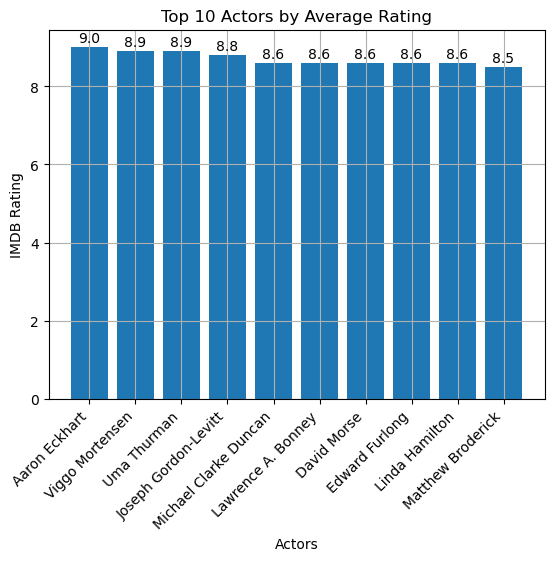

In [10]:
# Create bar chart showing Top 10 Actors by Average Rating

bar_chart = top_10_actors_rating.set_index('Actor')
bar_chart 

bars = plt.bar(bar_chart.index, bar_chart ['imdbRating'])
plt.title('Top 10 Actors by Average Rating')
plt.xlabel('Actors')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval,2), ha='center', va='bottom')

    
plt.grid()
plt.show()

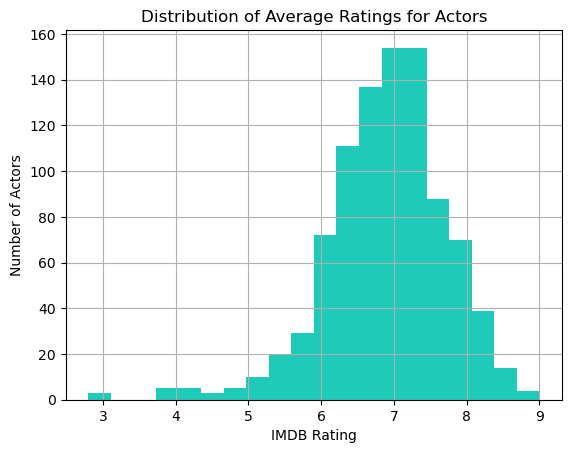

In [11]:
# Create a histogram for IMDB Rating Distribution
plt.hist(actor_avg_rating ['imdbRating'], bins=20, color='#1FCBB8')

# Add a title and labels
plt.title('Distribution of Average Ratings for Actors')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Actors')
plt.grid()

# Show the plot
plt.show()

# Conclusion: The majority of IMDb ratings for actors fall within the range of 6.9 to 7.4.

In [12]:
# Calculate the number of movies an actor played in 
actor_count_movies = actors_stacked_df['Actor'].value_counts()
actor_count_movies


Tom Hanks               16
Tom Cruise              15
Will Smith              13
Julia Roberts           13
Eddie Murphy            13
                        ..
Auli'i Cravalho          1
Rachel House             1
Benedict Cumberbatch     1
Chris O'Donnell          1
Sharlto Copley           1
Name: Actor, Length: 923, dtype: int64

In [13]:
# Select top 10 actors who played in the biggest amount of movies. Put it in a DataFrame and rename the columns
top_10_actors_movies = actor_count_movies.head(10)
top_10_actors_movies = pd.DataFrame(top_10_actors_movies)
top_10_actors_movies.reset_index()

top_10_actors_movies = top_10_actors_movies.rename(columns={"Actor": "Count of movies"})
top_10_actors_movies = top_10_actors_movies.rename_axis('Actor')
top_10_actors_movies

,Count of movies
Actor,
Tom Hanks,16
Tom Cruise,15
Will Smith,13
Julia Roberts,13
Eddie Murphy,13
Mel Gibson,13
Jim Carrey,12
Samuel L. Jackson,11
Adam Sandler,11


In [14]:
# Put actor_count_movies in a DataFrame and rename the columns
actor_count_movies = pd.DataFrame(actor_count_movies)
actor_count_movies  = actor_count_movies.rename(columns={"Actor": "Count of movies"})
actor_count_movies  = actor_count_movies.rename_axis('Actor')
actor_count_movies


,Count of movies
Actor,
Tom Hanks,16
Tom Cruise,15
Will Smith,13
Julia Roberts,13
Eddie Murphy,13
...,...
Auli'i Cravalho,1
Rachel House,1
Benedict Cumberbatch,1


In [15]:
# Comparison of actors with the top ratings and the amount of movies they played in
top_10_actors_movies_ratings = pd.merge(top_10_actors_rating, actor_count_movies , on="Actor")
top_10_actors_movies_ratings

# Conclusion: The top-rated actors have appeared in a maximum of 2 movies, suggesting they may be 
# relatively new to the industry.

,Actor,imdbRating,Count of movies
0,Aaron Eckhart,9.0,1
1,Viggo Mortensen,8.9,2
2,Uma Thurman,8.9,1
3,Joseph Gordon-Levitt,8.8,1
4,Michael Clarke Duncan,8.6,1
5,Lawrence A. Bonney,8.6,1
6,David Morse,8.6,1
7,Edward Furlong,8.6,1
8,Linda Hamilton,8.6,1
9,Matthew Broderick,8.5,2


In [16]:
# Comparison between most prolific actors and their ratings
top_10_actors_ratings_movies = pd.merge(top_10_actors_movies, actor_avg_rating , on="Actor")
top_10_actors_ratings_movies

# Conclusion: A high number of movie roles doesn't always correlate with a high average rating.

,Actor,Count of movies,imdbRating
0,Tom Hanks,16,7.600000
1,Tom Cruise,15,7.120000
2,Will Smith,13,6.700000
3,Julia Roberts,13,6.723077
4,Eddie Murphy,13,6.238462
5,Mel Gibson,13,6.876923
6,Jim Carrey,12,6.716667
7,Samuel L. Jackson,11,7.290909
8,Adam Sandler,11,6.363636
9,Robert Downey Jr.,11,7.654545


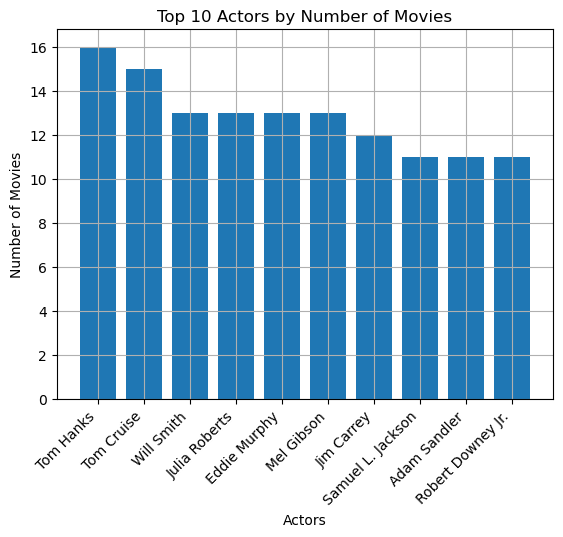

In [17]:
# Create bar chart showing Top 10 Actors by Movies Count
plt.bar(top_10_actors_ratings_movies['Actor'], top_10_actors_ratings_movies['Count of movies'])
plt.title('Top 10 Actors by Number of Movies')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.grid()
plt.show()

In [18]:
# Exploring the relationship between an Actor's Movie Count and their IMDB Rating
actor_count_movies = actor_count_movies.reset_index()

# Merging the two DataFrames on the 'Actor' column
merged_df = pd.merge(actor_count_movies, actor_avg_rating, on='Actor')
merged_df


,Actor,Count of movies,imdbRating
0,Tom Hanks,16,7.600000
1,Tom Cruise,15,7.120000
2,Will Smith,13,6.700000
3,Julia Roberts,13,6.723077
4,Eddie Murphy,13,6.238462
...,...,...,...
918,Auli'i Cravalho,1,7.600000
919,Rachel House,1,7.600000
920,Benedict Cumberbatch,1,7.500000
921,Chris O'Donnell,1,8.000000


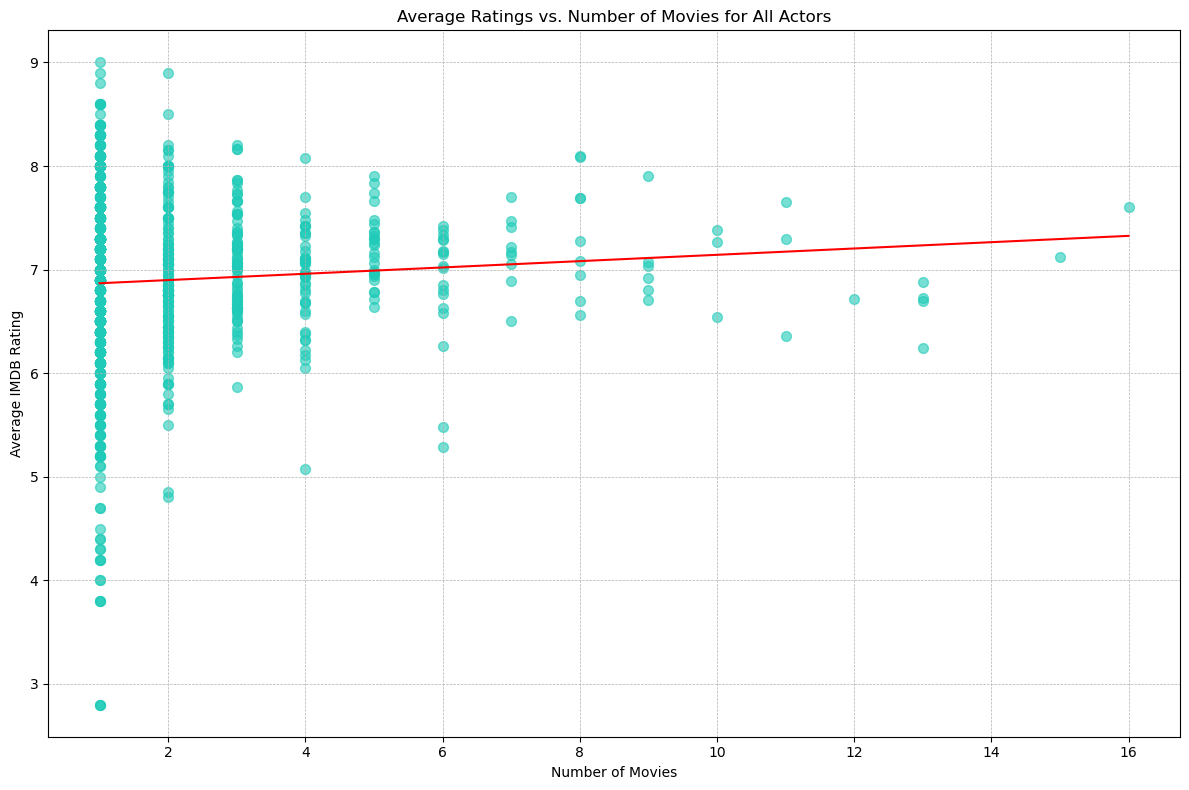

R-value (Correlation Coefficient): 0.07270210769242148
P-value: 0.02719643648236163


In [19]:
# Plotting scatter plot to show the relationship between an Actor's Movie Count and their IMDB Rating
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['Count of movies'], merged_df['imdbRating'], color='#1FCBB8', s=50, alpha=0.6)



# Add the linear regression equation and line to plot
x_values = merged_df['Count of movies']
y_values = merged_df['imdbRating']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")

# Adding title, labels, and a grid
plt.title('Average Ratings vs. Number of Movies for All Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Average IMDB Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print(f"R-value (Correlation Coefficient): {rvalue}")
print(f"P-value: {pvalue}")

## Analysis

Positive slope: it indicates that as the number of movies an actor has been in increases, their rating also tends to increase. It also implies the reverse: actors with higher ratings tend to have acted in more movies.

r-value is approximately 0.0729, which indicates there's a very slight trend that as actors play in more movies, their average rating slightly increases, but this relationship is weak.

p-value is approximately 0.0269, which is less than 0.05. This indicates that the weak positive correlation is statistically significant. 

### Part II

Actors, IMDB Ratings and Net Worth

In [21]:
# Import datasets
actor = Path('../Datasets/actor.csv')
actor_df = pd.read_csv(actor)
actor_df .head()

# Rename the "name" column
actor_df = actor_df.rename(columns={"name": 'Actor'})
actor_df 

,actorid,Actor,date_of_birth,birth_city,birth_country,height_inches,biography,gender,ethnicity,networth
0,2169,Aaron Eckhart,1968-03-12,Cupertino,USA,61.0,"Aaron Eckhart was born on March 12, 1968 in Cu...",Male,White,16000000.0
1,2204,Aasif Mandvi,1966-03-05,Bombay,India,68.0,"Aasif Mandvi was born on March 5, 1966 in Bomb...",Male,Indian,3000000.0
2,5,Abe Vigoda,1921-02-24,Brooklyn,USA,73.0,Abraham Charles Vigoda was an American actor k...,Male,White,10000000.0
3,1618,Abigail Breslin,1996-04-14,New York City,USA,61.0,Academy Award-nominated actress Abigail Bresli...,Female,White,8000000.0
4,1062,Abraham Benrubi,1969-10-04,Indianapolis,USA,79.0,"Abraham Benrubi was born on October 4, 1969 in...",Male,White,12000000.0
...,...,...,...,...,...,...,...,...,...,...
2594,1337,Ziyi Zhang,1979-02-09,Beijing,China,65.0,Ziyi Zhang is a Chinese actress and model. She...,NaN,NaN,NaN
2595,2566,Zoe Kravitz,1988-12-01,Los Angeles,USA,62.0,"Zoe Isabella Kravitz, the daughter of singer/a...",Female,NaN,NaN
2596,2232,Zoe Saldana,1978-06-19,Passaic,USA,66.0,"Zoe Saldana was born on June 19, 1978 in Passa...",Female,NaN,35000000.0
2597,2534,Zoey Vargas,NaN,NaN,NaN,NaN,"Zoey Vargas is an actress, known for Neighbors...",Female,NaN,NaN


In [22]:
# Merge two DataSets to combine Actor names, their IMDB ratings and NetWorth
actors_wealth = pd.merge(actor_avg_rating, actor_df, on='Actor')
actors_wealth = actors_wealth[['Actor', 'imdbRating', 'networth']]
actors_wealth

,Actor,imdbRating,networth
0,Aaron Eckhart,9.000000,16000000.0
1,Aaron Taylor-Johnson,6.400000,16000000.0
2,Adam Sandler,6.363636,420000000.0
3,Adrian Grenier,6.900000,12000000.0
4,Adrien Brody,7.200000,10000000.0
...,...,...,...
734,Zachary Levi,6.400000,12000000.0
735,Zachary Quinto,7.533333,20000000.0
736,Ziyi Zhang,7.900000,NaN
737,Zoe Saldana,7.733333,35000000.0


In [23]:
# Drop Nan values as set column "networth" as float
actors_wealth_df = actors_wealth.dropna(how='any').copy()
actors_wealth_df 
actors_wealth_df['networth'] = actors_wealth_df['networth'].astype(float)

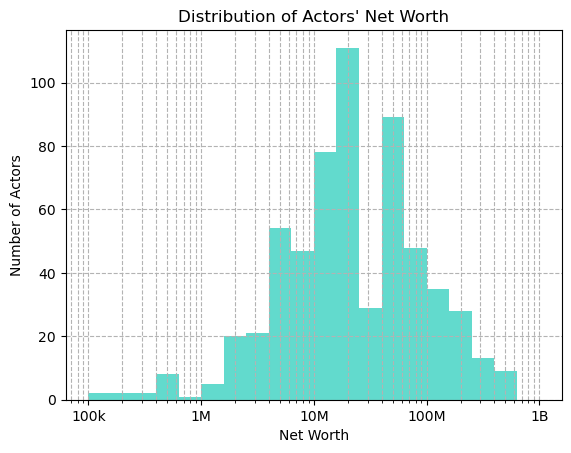

In [24]:
# Create a histogram for Net Worth Distribution
bins = np.logspace(np.log10(1e5), np.log10(1e9), 21) # 20 bins between 100k and 1B
plt.hist(actors_wealth_df['networth'], bins=bins, color='#1FCBB8', alpha=0.7)


# Add a title and labels
plt.title("Distribution of Actors' Net Worth")
plt.xlabel('Net Worth')
plt.ylabel('Number of Actors')


# Log scale for x-axis
plt.xscale('log')

# Adjust x-ticks for better clarity
tick_vals = [1e5, 1e6, 1e7, 1e8, 1e9]  
tick_labels = ['100k', '1M', '10M', '100M', '1B']
plt.xticks(tick_vals, tick_labels)

plt.grid(True, which="both", ls="--", c='0.7')



# Show the plot
plt.show()

In [25]:
actors_wealth_df.dtypes

Actor          object
imdbRating    float64
networth      float64
dtype: object

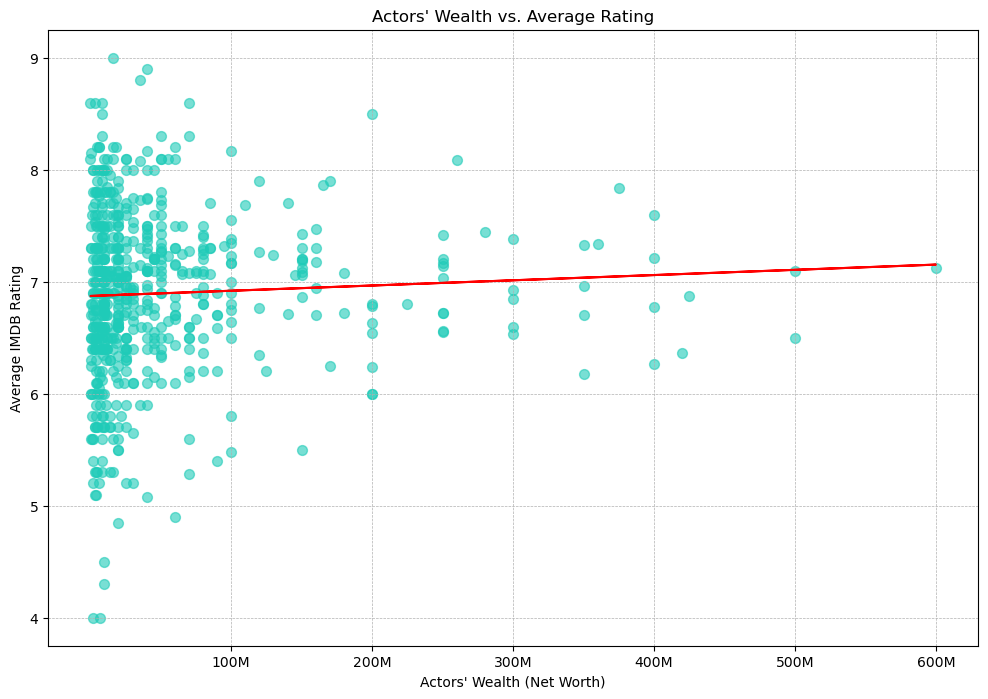

R-value (Correlation Coefficient): 0.05117020483921803
P-value: 0.2099480899225284


In [26]:
# Plotting scatter plot to show the relationship between an Actors'Net Worth and their IMDB Rating
plt.figure(figsize=(12, 8))

plt.scatter(actors_wealth_df['networth'], actors_wealth_df['imdbRating'], color='#1FCBB8', s=50, alpha=0.6)

# Add the linear regression equation and line to plot
x_values = actors_wealth_df['networth']
y_values = actors_wealth_df['imdbRating']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

# Adding title, labels, and a grid
plt.title("Actors' Wealth vs. Average Rating")
plt.xlabel("Actors' Wealth (Net Worth)")
plt.ylabel('Average IMDB Rating')

# Adding tick labels
ticks = []

for i in range(1, 7):
    one_tick = i* 100000000
    ticks.append(one_tick)

tick_labels = []

for tick in ticks:
    label = (f"{tick//1000000}M")
    tick_labels.append(label)

plt.xticks(ticks, tick_labels)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print(f"R-value (Correlation Coefficient): {rvalue}")
print(f"P-value: {pvalue}")


## Analysis

As R-value equals to: 0.05, which means there's a slight tendency that as actors' wealth increases, their average movie ratings also increase, but this relationship is very weak.  

P-value is 0.21, which is greater than the common significance threshold of 0.05. This means that the observed relationship between the actors' wealth and their average movie ratings is not statistically significant.

This analysis suggests that an actor's wealth doesn't necessarily predict the quality (as measured by IMDb ratings) of the movies they act in. Being wealthier doesn't necessarily mean an actor will be in higher-rated movies, and vice versa.